In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandasql import PandaSQL 
pdsql = PandaSQL()
from itertools import combinations_with_replacement as cwr

In [310]:
data = pd.read_csv('/Users/stefany/Desktop/analisisdatos/da2019-Stefany2889/datos/result.txt')#, header = None)
#print(data)
print(data.keys())

Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)


/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (69,70,83,84,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


No handles with labels found to put in legend.


Text(0, 0.5, 'ra [deg]')

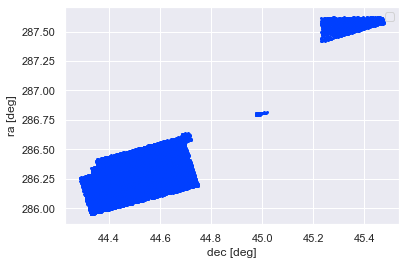

In [311]:
plt.style.use('seaborn-bright')
plt.plot(data['dec'], data['ra'], '.', markersize = 4)
plt.legend()
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')

No handles with labels found to put in legend.


(285.75, 286.75)

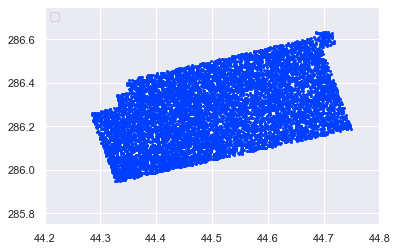

In [312]:
plt.plot(data['dec'], data['ra'], '.', markersize = 4)
plt.legend()
plt.xlim(44.2,44.8)
plt.ylim(285.75,286.75)

In [313]:


data1=pdsql("SELECT * FROM data WHERE dec < 44.48 AND dec >44.35 AND ra > 286.05 AND ra< 286.2  LIMIT 1000;")


print(len(data1))

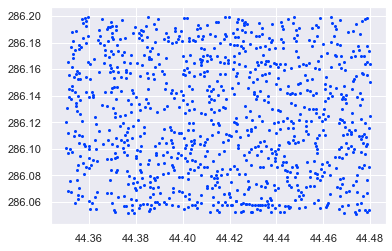

In [314]:
plt.plot(data1['dec'], data1['ra'], '.', markersize = 4)

Para la transformacion de coordenadas, ya que es una transformación de esfericas dada por $x= cos(ra)sen(dec)$, $y=sin(ra)sin(dec)$, $z=cos(dec)$, es necesario realizar una distribucion uniforme en la esfera limitada por $dec$ y $ra$ de los datos

##### Primero hacemos un cambio a de grados a radianes 
Donde $rad= \pi / 180º$      

In [315]:
rad=np.pi/180

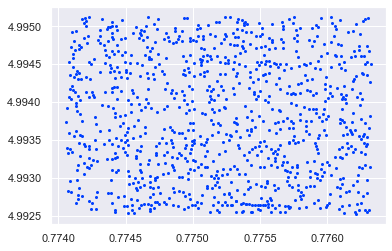

In [316]:
plt.plot(data1['dec']*rad, data1['ra']*rad, '.', markersize = 4)

In [317]:
dec_rad= data1['dec'].mul(rad)
ra_rad= data1['ra'].mul(rad)
max(np.cos(dec_rad)), min(np.cos(dec_rad)), max(np.cos(ra_rad)), min(np.cos(ra_rad))

(0.7150795248630128,
 0.7134951728944868,
 0.2789831426414876,
 0.2764831015379254)

In [318]:
#para la correlación
def trans(ra,dec):
    x=np.cos(ra)*np.sin(dec)
    y=np.sin(ra)*np.sin(dec)
    z=np.cos(dec)
    dist= np.sqrt((x**2)+(y**2)+(z**2))
    return x, y, z

In [319]:
transformacion=trans(ra_rad,dec_rad)

Text(0, 0.5, 'y')

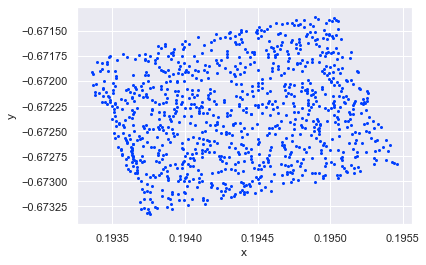

In [320]:
plt.plot(transformacion[0],transformacion[1], '.', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'z')

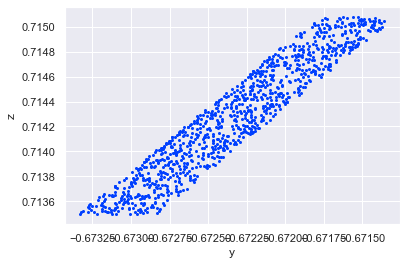

In [321]:
plt.plot(transformacion[1],transformacion[2], '.', markersize = 4)
plt.xlabel('y')
plt.ylabel('z')

In [322]:
#Random
def random(lim_dec, lim_ra, n):
    dec_min=lim_dec[0]
    dec_max=lim_dec[1]
    ra_min=lim_ra[0]
    ra_max=lim_ra[1]
    cos_dec=np.random.uniform(dec_min, dec_max,n)
    u=cos_dec
    dec_Ran=np.arccos(u)
    cos_ra=np.random.uniform(ra_min, ra_max,n)
    ra_rand=np.arccos(cos_ra)
    
    return cos_dec, cos_ra

In [323]:
#para randoms, cos_dec y cos_ra 
rand1=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 1000 )

trans_rand1=trans(np.arccos(rand1[1]),np.arccos(rand1[0]))


rand2=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 1000 )

trans_rand2=trans(np.arccos(rand2[1]),np.arccos(rand2[0]))

Text(0, 0.5, 'z')

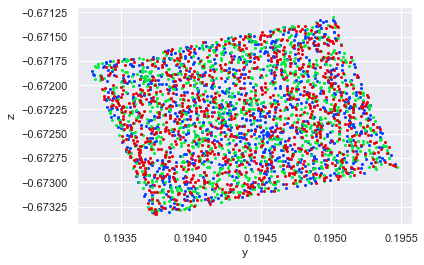

In [324]:
plt.plot(trans_rand1[0],-trans_rand1[1], '.', markersize = 4)
plt.plot(trans_rand2[0],-trans_rand2[1], '.', markersize = 4)
plt.plot(transformacion[0],transformacion[1], '.', markersize = 4)
plt.xlabel('y')
plt.ylabel('z')

In [325]:
 ## Prueba con 2 random
# Para la distancia entre DD
## random1 sera Datos

def distancia(theta,data):
    
    return np.sqrt((theta[0]-data[0])**2+(theta[1]-data[1])**2+(theta[2]-data[2])**2)


    

In [349]:
x = np.arange(len(trans_dat[0]))
comb = cwr(x, 2)
for i in list(comb):
    print(i)
        


0
0
0
1
1
2


Type:        combinations_with_replacement
String form: <itertools.combinations_with_replacement object at 0x1a16a95e90>
Docstring:  
combinations_with_replacement(iterable, r) --> combinations_with_replacement object

Return successive r-length combinations of elements in the iterable
allowing individual elements to have successive repeats.
combinations_with_replacement('ABC', 2) --> AA AB AC BB BC CC


In [352]:
def distancia1(x1,y1,z1,x2,y2,z2):
    x = np.arange(len(x1))
    comb = cwr(x, 2)
    x_1=np.zeros(len(x1))
    x_2=np.zeros(len(x1))
    l=np.zeros(len(x1))
    m=np.zeros(len(x1))
    for i in list(comb): 
        for j in range(len(comb)):
            
            l[i[0]]=x1[i[0]]
            m[i[1]]=x2[i[1]]
    return l,m

In [359]:
x = np.arange(3)
comb = cwr(x, 2)
#c=np.zeros()
x1=[4,5,6]
y1=[2,3,4]
z1=[5,6,7]
x2=[3,6,9]
y2=[2,3,3]
z2=[2,4,6]

for i in list(comb):
    #print("x",x[i[0]])
    #print("y",y[i[1]])
    c=distancia([x1[i[0]],y1[i[0]],z1[i[0]]],[x2[i[1]],y2[i[1]],z2[i[1]]])
    print(c)

3.1622776601683795
2.449489742783178
5.196152422706632
2.23606797749979
4.0
3.3166247903554


In [79]:
dist=distancia(trans_rand1[0],trans_rand1[1],trans_rand1[2],trans_rand2[0],trans_rand2[1],trans_rand2[2])
dist

4.2775206383012487e-07

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-4.99999572e-01, -3.99999572e-01, -2.99999572e-01, -1.99999572e-01,
        -9.99995722e-02,  4.27752064e-07,  1.00000428e-01,  2.00000428e-01,
         3.00000428e-01,  4.00000428e-01,  5.00000428e-01]),
 <a list of 10 Patch objects>)

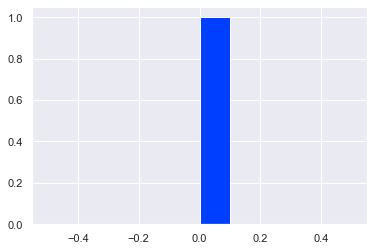

In [68]:
plt.hist(dist)

In [38]:
def corr(data, n):
    rad=np.pi/180
    dec_rad=data[0]  #*(rad)
    ra_rad= data[1]  #*(rad)
    
    trans_dat=trans(ra_rad,dec_rad)
    
    rand1=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], n)    
    trans_rand1=trans(np.arccos(rand1[1]),np.arccos(rand1[0]))
    
    x = np.arange(len(trans_dat[0]))
    comb = cwr(x, 2)
    for i in list(comb):
        print(i)
        DD=distancia(trans_dat[i[0]],trans_dat[1],trans_dat[2],trans_dat[0],trans_dat[1],trans_dat[2])
        DR=distancia(trans_dat[0],trans_dat[1],trans_rand1[2],-trans_rand1[0],-trans_rand1[1],-trans_rand1[2])
        RR=distancia(-trans_rand1[0],-trans_rand1[1],-trans_rand1[2],-trans_rand1[0],-trans_rand1[1],-trans_rand1[2])
    
    a=(DD-(2*DR)+RR)/RR
    return a

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-4.99998072e-01, -3.99998072e-01, -2.99998072e-01, -1.99998072e-01,
        -9.99980725e-02,  1.92750381e-06,  1.00001928e-01,  2.00001928e-01,
         3.00001928e-01,  4.00001928e-01,  5.00001928e-01]),
 <a list of 10 Patch objects>)

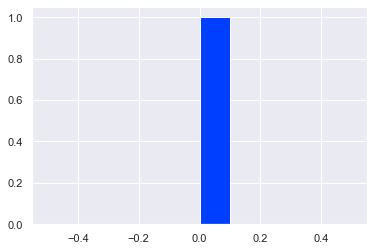

In [39]:
d1=distancia(trans_rand1[0],trans_rand1[1],trans_rand1[2],trans_rand1[0],trans_rand1[1],trans_rand1[2])

plt.hist(d1)

In [41]:

rand2=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 1000 )

trans_rand2=trans(np.arccos(rand2[1]),np.arccos(rand2[0]))



In [49]:
corr=corr([rand2[0], rand2[1]], 1000)
corr

TypeError: 'numpy.float64' object is not callable

In [46]:
x = np.linspace(0,1,len(corr))
print(len(x)), print(len(corr))

TypeError: object of type 'numpy.float64' has no len()

In [47]:
plt.plot(x,corr)

NameError: name 'x' is not defined

In [245]:
n=1000

In [274]:
rand3=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 2000 )

x=rand3[0]
y=rand3[0]
trans_rand2=trans(np.arccos(rand2[1]),np.arccos(rand2[0]))
corr=corr([x, y],2000)

/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


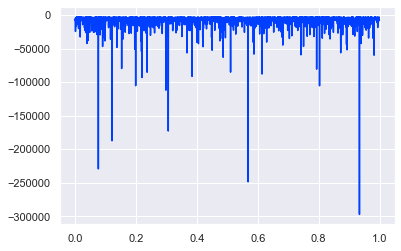

In [276]:
x = np.linspace(0,1,len(corr))
plt.plot(x,corr)